# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками-и-изменением-типа-данных" data-toc-modified-id="Работа-с-пропусками-и-изменением-типа-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками и изменением типа данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчёт-цены-за-1-кв.метр" data-toc-modified-id="Расчёт-цены-за-1-кв.метр-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёт цены за 1 кв.метр</a></span></li><li><span><a href="#Расчёт-дня-недели,-месяца-и-года-публикации-объявления" data-toc-modified-id="Расчёт-дня-недели,-месяца-и-года-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчёт дня недели, месяца и года публикации объявления</a></span></li><li><span><a href="#Расчёт-этажей-квартиры" data-toc-modified-id="Расчёт-этажей-квартиры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчёт этажей квартиры</a></span></li><li><span><a href="#Расчёт-соотношения-жилой-и-общей-площади" data-toc-modified-id="Расчёт-соотношения-жилой-и-общей-площади-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчёт соотношения жилой и общей площади</a></span></li><li><span><a href="#Расчёт-отношения-площади-кухни-к-общей" data-toc-modified-id="Расчёт-отношения-площади-кухни-к-общей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Расчёт отношения площади кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Стоимость-квартиры" data-toc-modified-id="Стоимость-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Стоимость квартиры</a></span></li><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Создадим-новый-фрейм-на-основе-полученных-данных." data-toc-modified-id="Создадим-новый-фрейм-на-основе-полученных-данных.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Создадим новый фрейм на основе полученных данных.</a></span></li></ul></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удаленности-от-центра" data-toc-modified-id="Зависимость-цены-от-удаленности-от-центра-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Зависимость цены от удаленности от центра</a></span></li><li><span><a href="#Зависимость-цены-от-этажа" data-toc-modified-id="Зависимость-цены-от-этажа-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Зависимость цены от этажа</a></span></li><li><span><a href="#Зависимость-цены-от-года" data-toc-modified-id="Зависимость-цены-от-года-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Зависимость цены от года</a></span></li><li><span><a href="#Зависимость-цены-от-месяца." data-toc-modified-id="Зависимость-цены-от-месяца.-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Зависимость цены от месяца.</a></span></li><li><span><a href="#Зависимость-цены-от-дня-недели" data-toc-modified-id="Зависимость-цены-от-дня-недели-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Зависимость цены от дня недели</a></span></li><li><span><a href="#10-населённых-пунктов-с-наибольшим-числом-объявлений." data-toc-modified-id="10-населённых-пунктов-с-наибольшим-числом-объявлений.-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>10 населённых пунктов с наибольшим числом объявлений.</a></span></li><li><span><a href="#Квартиры-в-Санкт-Петербурге" data-toc-modified-id="Квартиры-в-Санкт-Петербурге-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Квартиры в Санкт-Петербурге</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат-квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Зависимость-цены-от-количества-комнат-квартиры-в-центре-Санкт-Петербурга-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>Зависимость цены от количества комнат квартиры в центре Санкт-Петербурга</a></span></li><li><span><a href="#Зависимость-цены-от-этажа-квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Зависимость-цены-от-этажа-квартиры-в-центре-Санкт-Петербурга-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>Зависимость цены от этажа квартиры в центре Санкт-Петербурга</a></span></li><li><span><a href="#Зависимость-цены-от-расположения-квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Зависимость-цены-от-расположения-квартиры-в-центре-Санкт-Петербурга-5.12"><span class="toc-item-num">5.12&nbsp;&nbsp;</span>Зависимость цены от расположения квартиры в центре Санкт-Петербурга</a></span></li><li><span><a href="#Зависимость-цены-от-месяца-публикации-объявления-о-продаже-квартиры-в-центре-Санкт-Петербурга" data-toc-modified-id="Зависимость-цены-от-месяца-публикации-объявления-о-продаже-квартиры-в-центре-Санкт-Петербурга-5.13"><span class="toc-item-num">5.13&nbsp;&nbsp;</span>Зависимость цены от месяца публикации объявления о продаже квартиры в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></div>

## Изучение данных из файла

In [74]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
pd.options.display.max_columns = None
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('\real_estate_data.csv', sep='\t')

Прочитаем файл и добавим разделитель '\t'.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итого у нас 23699 строк данных.

Требует замены тип данных на bool в столбце is_apartment.

Есть пропуски в столбцах:
ceiling_height
floors_total
living_area
is_apartment
kitchen_area
balcony
locality_name
airports_nearest
cityCenters_nearest
parks_around3000  
parks_nearest  
ponds_around3000  
ponds_nearest  
days_exposition

In [76]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,3,16,51,8,NaN,False,False,25,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,19,1,NaN,False,False,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34,4,NaN,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,False,False,41,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121


Посмотрим на названия столбцов:

In [77]:
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Вывод

Итого 23699 строк. 
- Мы обнаружили довольно много пропущенных значений, также необходимо изменить 1 тип данных на булев и несколько на int. - Названия столбцов оформлены правильно.
- Из таблицы можем предложить, что пропущенные данные в столбце 'апартаменты' можно заполнить логически, т.к большинство квартир к этому типу не принадлежит, по такому же принципу можно заполнить пропуски в столбце 'балкон'.

## Предобработка данных

In [78]:
df.isna().mean() * 100

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height         39
floors_total            0
living_area             8
floor                   0
is_apartment           88
studio                  0
open_plan               0
kitchen_area           10
balcony                49
locality_name           0
airports_nearest       23
cityCenters_nearest    23
parks_around3000       23
parks_nearest          66
ponds_around3000       23
ponds_nearest          62
days_exposition        13
dtype: float64

### Работа с пропусками и изменением типа данных

Больше всего пропусков в столбце "is_apartment", рассмотрим его подробнее:

In [79]:
df['is_apartment'].value_counts(dropna = False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Итого: мы получили картину данных, которая говорит о том, что пропусков ввиде NaN большинство, однако, из жизни мы знаем, что большинство квартир не входит в категорию "апартаменты", исходя из этого предположения, заменим пропуски на False.

In [80]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим:

In [81]:
df['is_apartment'].value_counts(dropna = False)

False    23649
True        50
Name: is_apartment, dtype: int64

Теперь изменим тип данных столбца на булев и проверим:

In [82]:
df = df.astype({"is_apartment": bool})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [83]:
df['is_apartment'].value_counts(dropna = False)

False    23649
True        50
Name: is_apartment, dtype: int64

Рассмотрим столбец "balcony":

In [84]:
df['balcony'].value_counts(dropna = False)

NaN    11519
1       4195
0       3758
2       3659
5        304
4        183
3         81
Name: balcony, dtype: int64

Мы видим, что пропущенных значений в столбце слишком много. В данном примере, основываясь на жизненном опыте, также можно предположить, что пропуски означают отсутствие балкона, поэтому заполним их 0. Проверим.

In [85]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].value_counts(dropna = False)

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Необходимо изменить тип данных в столбце: balcony с вещественного на целочисленный. Проверим.

In [86]:
df = df.astype({"balcony": int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменим тип данных в столбце "floors_total" на int, для этого сначала заменим все пропуски на 0, т.к это не помешает в дальнейших расчетах.

In [87]:
df.floors_total = df.floors_total.fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int32  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Тип данных изменен с вещественного на целочисленный для удобства вычислений и визуального восприятия. Для этого выбран метод astype(), так как он удобен тем, что может обработать сразу несколько столбцов и в нем указывается какой именно итоговый тип данных необходим для каждого столбца.

Проверим такое предположение: а что, если у нас строки с большим количеством пропущенных значений, которые мы можем удалить без потери для дальнейшего исследования:

In [88]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Предположение не подтвердилось - слишком много пропусков для простого удаления.

### Дубликаты

Посмотрим, как у нас обстоят дела с дубликатами:

In [89]:
df.duplicated().sum()

0

Отлично! Судя по всему дубликатов у нас нет.

## Расчёты и добавление результатов в таблицу

### Расчёт цены за 1 кв.метр

Рассчитаем цену за 1 кв.метр и приведем к 1 знаку после запятой.

In [90]:
df['price_m2'] = df['last_price'] / df['total_area']
df['price_m2'] = df['price_m2'].round(1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000000,108,2019-03-07T00:00:00,3,3,16,51,8,False,False,False,25,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,19,1,False,False,False,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82921
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34,4,False,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


### Расчёт дня недели, месяца и года публикации объявления

Посчитаем и добавим в таблицу новые столбцы: 

"day", "month", "year" - рассчитаем день недели, месяц и год публикации объявления соответственно.

Для этого:
1. Создадим столбец "day", с помощью DatetimeIndex, где 0 - понедельник, а 6 - воскресенье соответственно.
2. Таким же способом создадим столбцы "month" и "year".
3. Проверим.

In [91]:
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
display(df.loc[:, ['first_day_exposition', 'day']].head())

,first_day_exposition,day
0,2019-03-07T00:00:00,3
1,2018-12-04T00:00:00,1
2,2015-08-20T00:00:00,3
3,2015-07-24T00:00:00,4
4,2018-06-19T00:00:00,1


In [92]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
display(df.loc[:, ['first_day_exposition', 'month']].head())

,first_day_exposition,month
0,2019-03-07T00:00:00,3
1,2018-12-04T00:00:00,12
2,2015-08-20T00:00:00,8
3,2015-07-24T00:00:00,7
4,2018-06-19T00:00:00,6


In [93]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
display(df.loc[:, ['first_day_exposition', 'year']].head())

,first_day_exposition,year
0,2019-03-07T00:00:00,2019
1,2018-12-04T00:00:00,2018
2,2015-08-20T00:00:00,2015
3,2015-07-24T00:00:00,2015
4,2018-06-19T00:00:00,2018


### Расчёт этажей квартиры

Добавим в таблицу столбец "floor_group" для распределения этажей по категориям: первый, последний или другой.

1. Для начала напишем функцию для распределения
2. Внесем данные в новый столбец
3. Затем проверим вывод.

In [94]:
def group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [95]:
df['floor_group'] = df.apply(group, axis=1)
display(df.loc[:, ['floors_total', 'floor', 'floor_group']].head())

,floors_total,floor,floor_group
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,9,другой
4,14,13,другой


### Расчёт соотношения жилой и общей площади

Посчитаем соотношение жилой площади и общей площади, создадим столбец "ratio_liv_tot"

In [96]:
df['ratio_liv_tot'] = df['living_area'] / df['total_area']
df['ratio_liv_tot'] = df['ratio_liv_tot'].round(1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_group,ratio_liv_tot
0,20,13000000,108,2019-03-07T00:00:00,3,3,16,51,8,False,False,False,25,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370,3,3,2019,другой,0
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,19,1,False,False,False,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82921,1,12,2018,первый,0
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34,4,False,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786,3,8,2015,другой,1
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,NaN
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0


Там, где у нас не пустые значения, получились данные.

### Расчёт отношения площади кухни к общей

Теперь сделаем то же самое для следующего расчета:
1. создадим столбец "ratio_kit_tot"
2. посчитаем отношение площади кухни к общей площади
3. проверим

In [97]:
df['ratio_kit_tot'] = df['kitchen_area'] / df['total_area']
df['ratio_kit_tot'] = df['ratio_kit_tot'].round(1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_group,ratio_liv_tot,ratio_kit_tot
0,20,13000000,108,2019-03-07T00:00:00,3,3,16,51,8,False,False,False,25,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370,3,3,2019,другой,0,0
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,19,1,False,False,False,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82921,1,12,2018,первый,0,0
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34,4,False,False,False,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786,3,8,2015,другой,1,0
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0,0


## Исследовательский анализ данных

Перейдем к изучению данных.

### Общая площадь

1. Построим гистограмму площади.
2. Получим числовое описание данных с помощью метода describe().

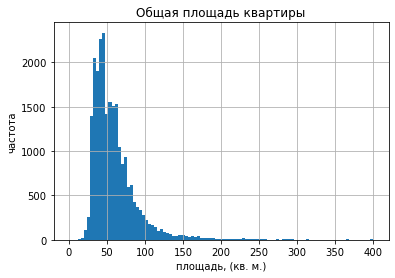

In [98]:
df['total_area'].hist(bins=100, range=(0, 400))
plt.title('Общая площадь квартиры')
plt.xlabel('площадь, (кв. м.)')
plt.ylabel('частота')
plt.show()

In [99]:
df['total_area'].describe()

count   23699
mean       60
std        36
min        12
25%        40
50%        52
75%        70
max       900
Name: total_area, dtype: float64

1. тип распределения - нормальное с длинной правой частью из-за max=900
2. медиана 52 м2
3. среднее 60 м2

Вывод: макс. значение 900 м2 - это явно слишком много, квартиры площадью больше 150 м2 уже редки, на участке больше 300 м2 - единичные варианты. Возьмем верхнюю границу - 250 м2.

### Стоимость квартиры

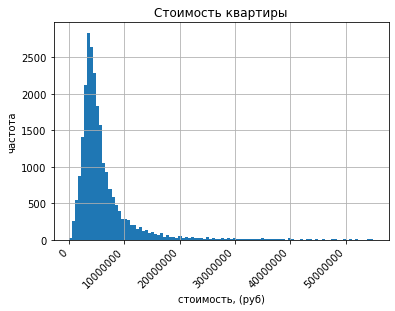

In [100]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45, ha='right')
plt.title('Стоимость квартиры')
plt.xlabel('стоимость, (руб)')
plt.ylabel('частота')
df['last_price'].hist(bins=100, range=(0, 55000000));

In [101]:
pd.options.display.float_format = '{:.1f}'.format
df['last_price'].describe()

count       23699.0
mean      6541548.8
std      10887013.3
min         12190.0
25%       3400000.0
50%       4650000.0
75%       6800000.0
max     763000000.0
Name: last_price, dtype: float64

Т.к возникли сложности в отображении гистограммы и числовом описании, то мы воспользовались plt.ticklabel_format(style='plain'), чтобы избавиться от экспоненциальной записи числа по оси х. Также использовали plt.xticks(rotation=45, ha='right') для удобной визуализации больших чисел.

В числовом описании добавили pd.options.display.float_format = '{:.1f}'.format, также для удобства использования.

1. тип распределения - нормальное с длинной правой частью, снова из-за редких высоких значений
2. медиана 4650000.0
3. среднее 6541548.8

Вывод: минимальная стоимость в 12 тыс кажется слишком низкой, однако, таких значений не много. Зато стоимость свыше 30 млн почти не встречается, поэтому выберем верхнюю границу в 28 млн.

### Число комнат

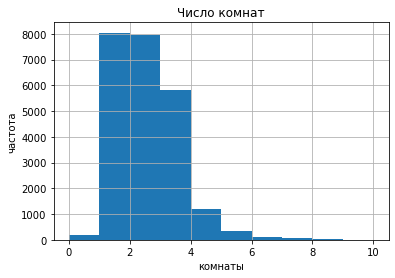

In [102]:
df['rooms'].hist(bins=10, range=(0, 10))
plt.title('Число комнат')
plt.xlabel('комнаты')
plt.ylabel('частота')
plt.show()

In [103]:
df['rooms'].describe()

count   23699.0
mean        2.1
std         1.1
min         0.0
25%         1.0
50%         2.0
75%         3.0
max        19.0
Name: rooms, dtype: float64

1. тип распределения - нормальное с длинной правой частью
2. медиана 2
3. среднее 2.1

Вывод: медиана и среднее, можно сказать, равны, значит квартиры с большим количеством комнат достаточно редки, можно смело устанавливать верхнюю границу на 8 комнатах.

### Высота потолков

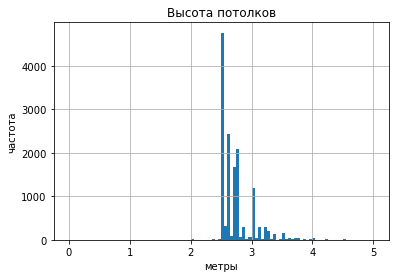

In [104]:
pd.options.display.float_format = '{:.2f}'.format
df['ceiling_height'].hist(bins=100, range=(0, 5))
plt.title('Высота потолков')
plt.xlabel('метры')
plt.ylabel('частота')
plt.show()

In [105]:
df['ceiling_height'].describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

1. тип распределения - нормальное с длинной правой частью
2. медиана 2.65
3. среднее 2.77

Вывод: бросается в глаза в численном описании минимальная высота потолка - 1 метр и максимальная - 100 метров - похоже на выбросы. Всё-таки возьмем нижнюю границу 2.20, а верхнюю 4.

### Время продажи квартиры

1. Построим гистограмму
2. Посмотрим числовое описание данных

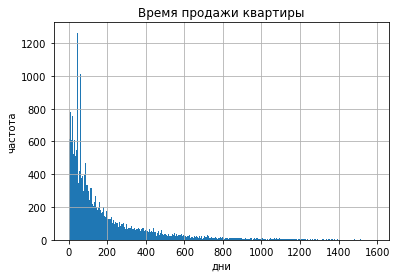

In [106]:
df['days_exposition'].hist(bins=300)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('частота')
plt.show()

In [107]:
df['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

1. тип распределения - нормальное с длинной правой частью
2. медиана 95.00
3. среднее 180.89

Вывод: медиана и среднее отличаются почти в 2 раза, это говорит о том, что в данных довольно много значений, превышающих медиану.

Обращает на себя внимание то, что довольно много данных возле отметки 0, хотя в среднем, продажа квартиры совершается за период от 1,5 до 7,7 месяцев.

Некоторые квартиры продаются по 3-4 года, кажется, это слишком долго, поэтому возьмем верхнюю границу 1000 дней.

### Создадим новый фрейм на основе полученных данных.
1. воспользуемся методом query() для фильтра по условиям
2. проверим

In [108]:
df_new = df.copy()
df_new = df.query('total_area < 250 and last_price < 28000000 and rooms < 8 and ceiling_height > 2.20 and ceiling_height < 4 and days_exposition < 1000')
df_new.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,11595.00,11595.00,11595.00,11595.00,11595.00
mean,57.30,5627338.32,2.03,2.70,172.65
std,25.39,3634080.27,0.98,0.23,190.84
min,12.00,12190.00,0.00,2.25,1.00
25%,40.00,3500000.00,1.00,2.50,45.00
50%,51.00,4600000.00,2.00,2.65,99.00
75%,68.00,6500000.00,3.00,2.78,232.00
max,248.00,27933600.00,7.00,3.98,999.00


## Факторы, влияющие на стоимость квартиры



### Зависимость цены от площади

Построим график зависимости стоимости квартиры от площади

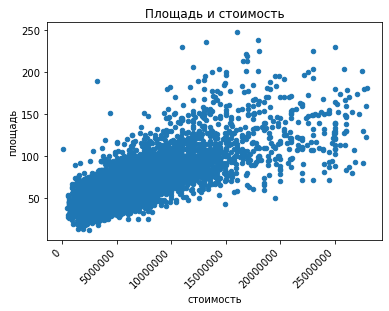

In [109]:
df_new.plot(x='last_price', y='total_area', kind='scatter')
plt.title('Площадь и стоимость')
plt.xlabel('стоимость')
plt.ylabel('площадь')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45, ha='right')
plt.show()

На графике явно видна зависимость - чем больше площадь, тем выше цена.

### Зависимость цены от количества комнат

Теперь посмотрим на соотношение цены и количества комнат:

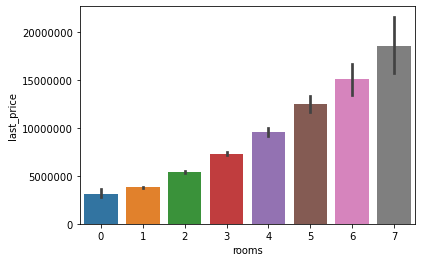

In [110]:
plt.ticklabel_format(style='plain')
sns.barplot(data=df_new, x='rooms', y='last_price');

На графике заметно увеличение цены с увеличением количества комнат.

### Зависимость цены от удаленности от центра

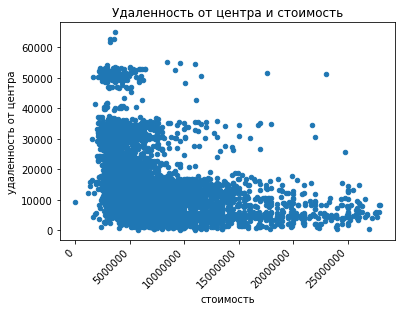

In [111]:
df_new.plot(x='last_price', y='cityCenters_nearest', kind='scatter')
plt.title('Удаленность от центра и стоимость')
plt.xlabel('стоимость')
plt.ylabel('удаленность от центра')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45, ha='right')
plt.show()

График показывает, что чем дальше от центра, тем реже встречаются дорогие квартиры.

### Зависимость цены от этажа

Ранее мы распределили все этажи по трем группам: первый, последний и другой. Посмотрим как распределяется стоимость.

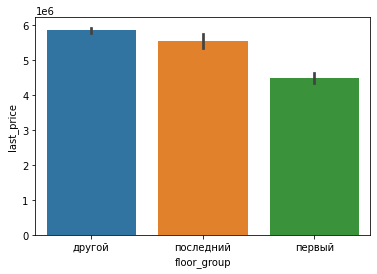

In [112]:
sns.barplot(data=df_new, x='floor_group', y='last_price');

График нам говорит о том, что покупатели любят серединку и меньше всего - первый этаж.

### Зависимость цены от года

Давайте узнаем в каком году совершено больше всего сделок по продаже квартир.

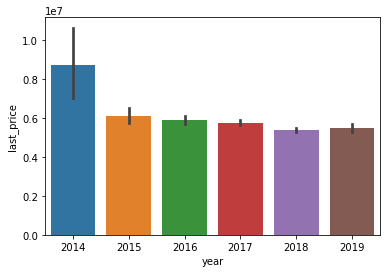

In [113]:
sns.barplot(data=df_new, x='year', y='last_price');

Итак, похоже, что самый высокий показатель в 2014 году, а самый низкий в 2018 году.

### Зависимость цены от месяца.

Теперь, выясним какой месяц самый окупаемый.

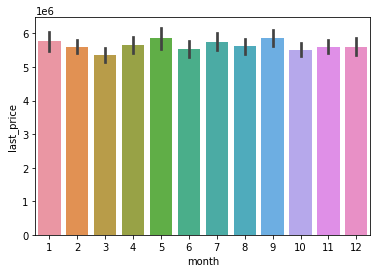

In [114]:
sns.barplot(data=df_new, x='month', y='last_price');

Судя по графику, покупают квартиры в сентябре (возможно, для студентов), в мае (к отпуску?) и в январе (подарок на новый год), а меньше всего в марте...

### Зависимость цены от дня недели

Мы помним, что 0 - понедельник, а 6 - воскресенье, так построим же график.

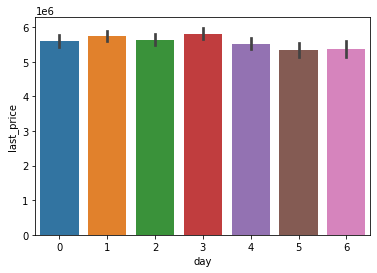

In [115]:
sns.barplot(data=df_new, x='day', y='last_price');

Видимо, больше всего квартир покупают по четвергам, а меньше всего в выходные.

In [116]:
print("Корреляция цены и площади квартиры:", df_new['last_price'].corr(df_new['total_area']))
print("Корреляция цены и количества комнат:", df_new['last_price'].corr(df_new['rooms']))
print("Корреляция цены и расстояния до центра:", df_new['last_price'].corr(df_new['cityCenters_nearest']))

Корреляция цены и площади квартиры: 0.7848649809354656
Корреляция цены и количества комнат: 0.5090675187081816
Корреляция цены и расстояния до центра: -0.3454870278985762


                     cityCenters_nearest  rooms  total_area
cityCenters_nearest                 1.00  -0.33       -0.35
rooms                              -0.33   1.00        0.85
total_area                         -0.35   0.85        1.00


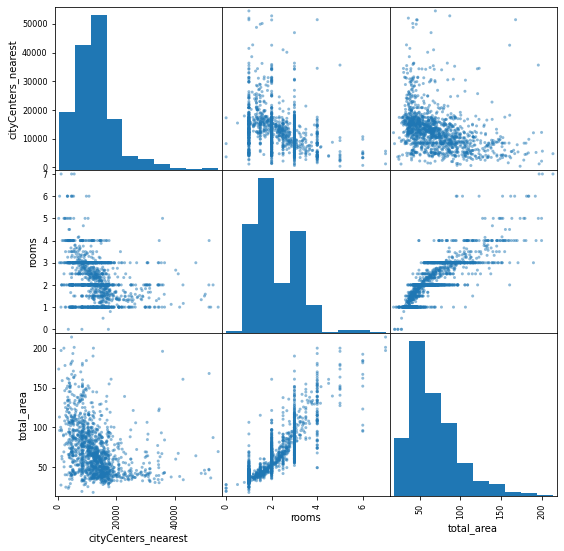

In [117]:
price_multi = df_new.pivot_table(index='last_price', values=['total_area', 'rooms', 'cityCenters_nearest'], aggfunc= 'mean')
print(price_multi.corr())
pd.plotting.scatter_matrix(price_multi, figsize=(9, 9));

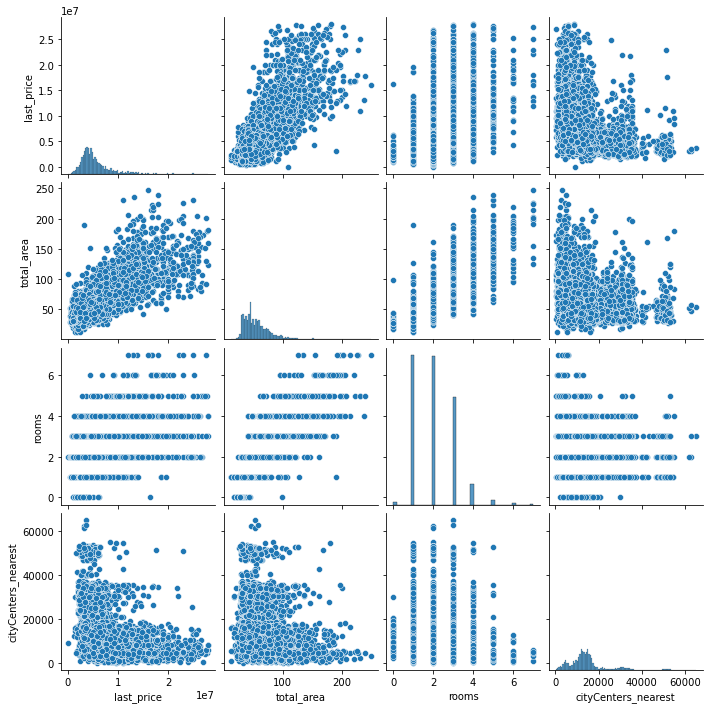

In [118]:
cols = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']
sns_plot = sns.pairplot(df_new[cols])

### 10 населённых пунктов с наибольшим числом объявлений.

Теперь, давайте рассмотрим 10 населённых пунктов с наибольшим числом объявлений, чтобы получше изучить данные и возможные зависимости. 
Создадим новую таблицу для удобства и сохранности основных данных. Проверим.

In [119]:
list_of_sett = df_new[['locality_name', 'price_m2']]
list_of_sett.head(10)

,locality_name,price_m2
4,Санкт-Петербург,100000.00
9,Санкт-Петербург,88524.60
10,Санкт-Петербург,127525.30
13,Петергоф,82943.90
16,Санкт-Петербург,81707.30
18,Санкт-Петербург,104838.70
19,Санкт-Петербург,117355.40
20,посёлок Парголово,76500.00
22,деревня Кудрово,86206.90
23,Санкт-Петербург,92187.50


Создадим таблицу с помощью pivot_table() и отсортируем по количеству объявлений, чтобы выбрать 10 населенных пунктов с наибольшим показателем.

In [120]:
list_of_sett = list_of_sett.pivot_table(index=['locality_name'], values='price_m2', aggfunc=['count','mean'])

list_of_sett.columns=['total', 'ratio']
list_top_10 = list_of_sett.sort_values('total', ascending=False).head(10)

Отфильтруем топ 10 по средней цене за кв. метр и рассмотрим подробнее.

In [121]:
list_top_10.sort_values('ratio', ascending=False)

,total,ratio
locality_name,,
Санкт-Петербург,8027,108758.43
Пушкин,180,100377.58
деревня Кудрово,119,90739.28
посёлок Парголово,119,89466.81
посёлок Мурино,195,87360.54
Петергоф,122,83343.81
посёлок Шушары,188,78567.33
Колпино,178,75018.54
Гатчина,125,69179.96


Из полученной таблицы видим, что Санкт-Петербург безусловный лидер по количеству объявлений, однако, средняя цена за кв. метр не намного выше, чем у всех других. Завершает список Всеволожск - по количеству объявлений он лидирует, исключая Питер, а вот цена самая низкая - все логично - где дешевле, там больше спрос, в данном контексте.

### Квартиры в Санкт-Петербурге

Теперь изучим подробнее квартиры в Санкт-Петербурге.
Создадим новую таблицу с необходимыми столбцами из отфильтрованного дата фрейма.

In [122]:
list_SP = df_new[['locality_name', 'cityCenters_nearest', 'last_price']]
list_SP.head()

,locality_name,cityCenters_nearest,last_price
4,Санкт-Петербург,8098.00,10000000.00
9,Санкт-Петербург,15008.00,5400000.00
10,Санкт-Петербург,13878.00,5050000.00
13,Петергоф,33058.00,3550000.00
16,Санкт-Петербург,10698.00,6700000.00


И проверим - не потеряли ли мы что-нибудь.

In [123]:
list_SP = list_SP.query('locality_name == "Санкт-Петербург"')
len(list_SP)

8027

Все на месте, приступаем к анализу:
1. создадим новый столбец с расстоянием до центра в км
2. проверим

In [124]:
pd.options.display.float_format = '{:.0f}'.format
list_SP['nearest_km'] = list_SP['cityCenters_nearest'] / 1000
list_SP['nearest_km'] = list_SP['nearest_km'].round()
list_SP.head()

,locality_name,cityCenters_nearest,last_price,nearest_km
4,Санкт-Петербург,8098,10000000,8
9,Санкт-Петербург,15008,5400000,15
10,Санкт-Петербург,13878,5050000,14
16,Санкт-Петербург,10698,6700000,11
18,Санкт-Петербург,10842,3250000,11


Отфильтруем таблицу по расстоянию до центра и найдем среднюю цену каждого км, пересохраним в новую таблицу:

In [125]:
list_SP_1 = list_SP.groupby('nearest_km')['last_price'].mean()
list_SP_1.head()

nearest_km
0   12068000
1   11093798
2   10653123
3    9072928
4   10195075
Name: last_price, dtype: float64

Построим график зависимости цены от расстояния до центра, чтобы определить самый центр и его границы.

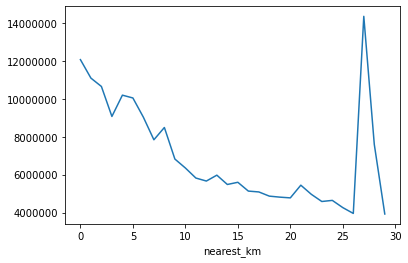

In [126]:
plt.ticklabel_format(style='plain')
list_SP_1.plot();

На мой взгляд, график получился не очень выразительным в плане резкого контура цен, однако, мне кажется, наиболее оптимальной будет точка - 10 км от центра, потому что после неё линия начинает идти гораздо плавнее. Также бросается в глаза резкое повышение цены за квартиру где-то за 25-м км, возможно, это какой-то дорогой коттеджный поселок.

Итак, с центром определились, теперь отфильтруем из df_new данные, подходящие по условию - расстояние до центра меньше или равно 10 км (10 000 метров, в нашем случае) и создадим новую таблицу list_SP_center.

In [127]:
list_SP_center = df_new.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 10000')
list_SP_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_group,ratio_liv_tot,ratio_kit_tot
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,False,False,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,другой,0,0
56,14,4350000,41,2016-03-28T00:00:00,1,3,7,18,4,False,False,False,11,2,Санкт-Петербург,13772,9626,1,271,1,439,152,106098,0,3,2016,другой,0,0
63,2,20000000,118,2018-09-11T00:00:00,3,3,9,68,7,False,False,False,16,0,Санкт-Петербург,26055,4800,1,648,1,779,37,169492,1,9,2018,другой,1,0
85,13,5200000,46,2018-11-26T00:00:00,2,3,5,28,5,False,False,False,8,0,Санкт-Петербург,13334,9319,0,NaN,1,682,65,112311,0,11,2018,последний,1,0
94,3,3500000,30,2019-04-26T00:00:00,1,2,5,16,2,False,False,False,6,1,Санкт-Петербург,12921,7303,0,NaN,0,NaN,4,118644,4,4,2019,другой,0,0


Площадь квартиры

1. информация из отфильтрованного дата фрейма
2. информация из новой таблици list_SP_center

In [128]:
df_new['total_area'].describe()

count   11595
mean       57
std        25
min        12
25%        40
50%        51
75%        68
max       248
Name: total_area, dtype: float64

In [129]:
list_SP_center['total_area'].describe()

count   2401
mean      73
std       34
min       12
25%       47
50%       67
75%       91
max      248
Name: total_area, dtype: float64

Медиана и среднее в центре Санкт-Петербурга на 10 больше, это говорит о том, что квартиры тут немного просторнее в среднем.

Цена квартиры

1. информация из отфильтрованного дата фрейма
2. информация из новой таблици list_SP_center

In [130]:
df_new['last_price'].describe()

count      11595
mean     5627338
std      3634080
min        12190
25%      3500000
50%      4600000
75%      6500000
max     27933600
Name: last_price, dtype: float64

In [131]:
list_SP_center['last_price'].describe()

count       2401
mean     8843560
std      4928414
min        12190
25%      5450000
50%      7500000
75%     10880100
max     27933600
Name: last_price, dtype: float64

Медиана выше на 2 млн, а среднее на 3 млн в центре Санкт-Петербурга, это значит, что в среднем, квартиры тут дороже.

Количество комнат в квартире

1. информация из отфильтрованного дата фрейма
2. информация из новой таблици list_SP_center

In [132]:
df_new['rooms'].describe()

count   11595
mean        2
std         1
min         0
25%         1
50%         2
75%         3
max         7
Name: rooms, dtype: float64

In [133]:
list_SP_center['rooms'].describe()

count   2401
mean       2
std        1
min        0
25%        2
50%        2
75%        3
max        7
Name: rooms, dtype: float64

В целом, показатели очень похожи, поэтому делаем вывод, что количество комнат везде примерно одинаково и никак не зависит от расположения квартиры.

Высота потолков в квартире

1. информация из отфильтрованного дата фрейма
3. информация из новой таблици list_SP_center

In [134]:
df_new['ceiling_height'].describe()

count   11595
mean        3
std         0
min         2
25%         2
50%         3
75%         3
max         4
Name: ceiling_height, dtype: float64

In [135]:
list_SP_center['ceiling_height'].describe()

count   2401
mean       3
std        0
min        2
25%        3
50%        3
75%        3
max        4
Name: ceiling_height, dtype: float64

Как и в случае с количеством комнат, высота потолков примерно одинкова везде.

### Зависимость цены от количества комнат квартиры в центре Санкт-Петербурга

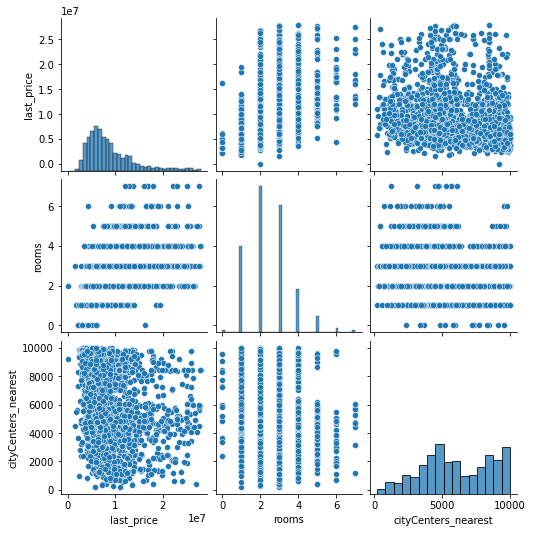

In [136]:
cols = ['last_price', 'rooms', 'cityCenters_nearest']
sns_plot = sns.pairplot(list_SP_center[cols])

Построим график

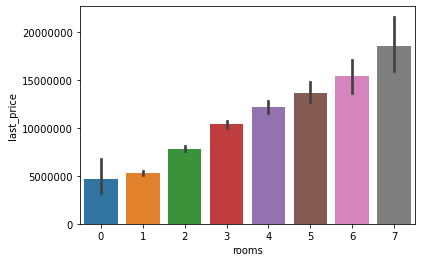

In [137]:
plt.ticklabel_format(style='plain')
sns.barplot(data=list_SP_center, x='rooms', y='last_price');

На графике явно прослеживается, что чем больше комнат, тем квартира дороже, как и в других местах.

### Зависимость цены от этажа квартиры в центре Санкт-Петербурга

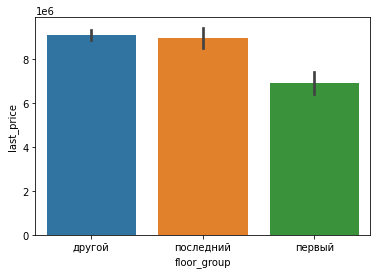

In [138]:
sns.barplot(data=list_SP_center, x='floor_group', y='last_price');

График показывает, что первый этаж по-прежнему не котруется, зато остальные показатели почти сравнялись.

### Зависимость цены от расположения квартиры в центре Санкт-Петербурга

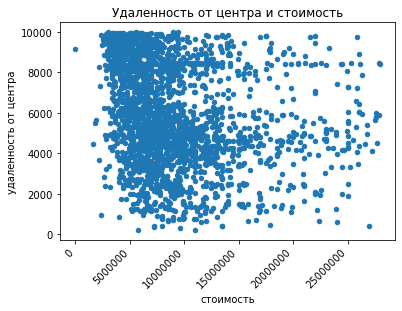

In [139]:
list_SP_center.plot(x='last_price', y='cityCenters_nearest', kind='scatter')
plt.title('Удаленность от центра и стоимость')
plt.xlabel('стоимость')
plt.ylabel('удаленность от центра')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45, ha='right')
plt.show()

По графику можно проследить, что чем ближе центр города, тем разброс цен сильнее, однако, это больше заметно в промежутке от 3х до 6 км.

### Зависимость цены от месяца публикации объявления о продаже квартиры в центре Санкт-Петербурга

Поскольку полные даты в использовании слишком громоздкие, я приняла решение распределить по месяцам.

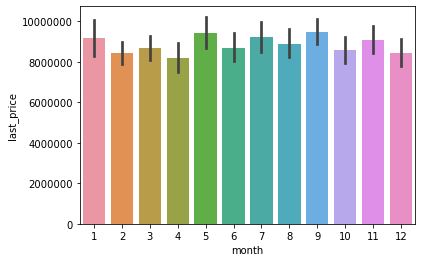

In [140]:
plt.ticklabel_format(style='plain')
sns.barplot(data=list_SP_center, x='month', y='last_price');

Здесь также прослеживаются пики количества сделок в январе, мае и сентябре, однако, самый неурожайный месяц - апрель, а не март, как в полных данных.

## Общий вывод

Мы исследовали базу данных по продажам квартир в Санкт-Петербурге и его окрестностях за 6 лет (2014-2019гг) и выяснили, что
1. на стоимость жилья значительно влияет общая площадь, количество комнат - в любом случае, зависимость прямая.
2. Также цена может зависеть от расстояния до центра - чем ближе, тем дороже.
3. Судя по данным, покупатели, вне зависимости от расположения квартиры, меньше всего выбирают первые этажи, а чаще всего средние.
4. Еще в ходе исследования было выявлено, что высота потолков не влияет на цену в значительной степени.
5. Определено среднее время продажи квартиры от 1,5 до 7,7 месяцев.


- Дубликатов в данных нет.
- Много пропусков, многие из них можно объяснить тем, что клиент не знает этих показателей (расстояние до пруда или центра). 
    - Однако, количество балконов, я могу лишь предполагать, что пропуск значит «балкона нет». Стоит обязать клиентов явно указывать данную информацию.
    - Также были обнаружены несколько аномальных значений, например потолки 1м или около 100м. Считаю, что стоит как-то проверять корректность (реалистичность) вводимых данных.